<a href="https://colab.research.google.com/github/manuel222-design/manuel222-design/blob/main/Cancer_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['malignant'] = data.target

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

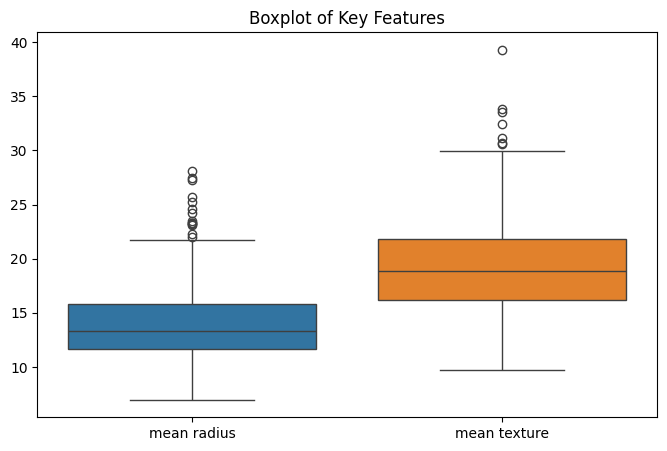

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['mean radius','mean texture']])
plt.title("Boxplot of Key Features")
plt.show()

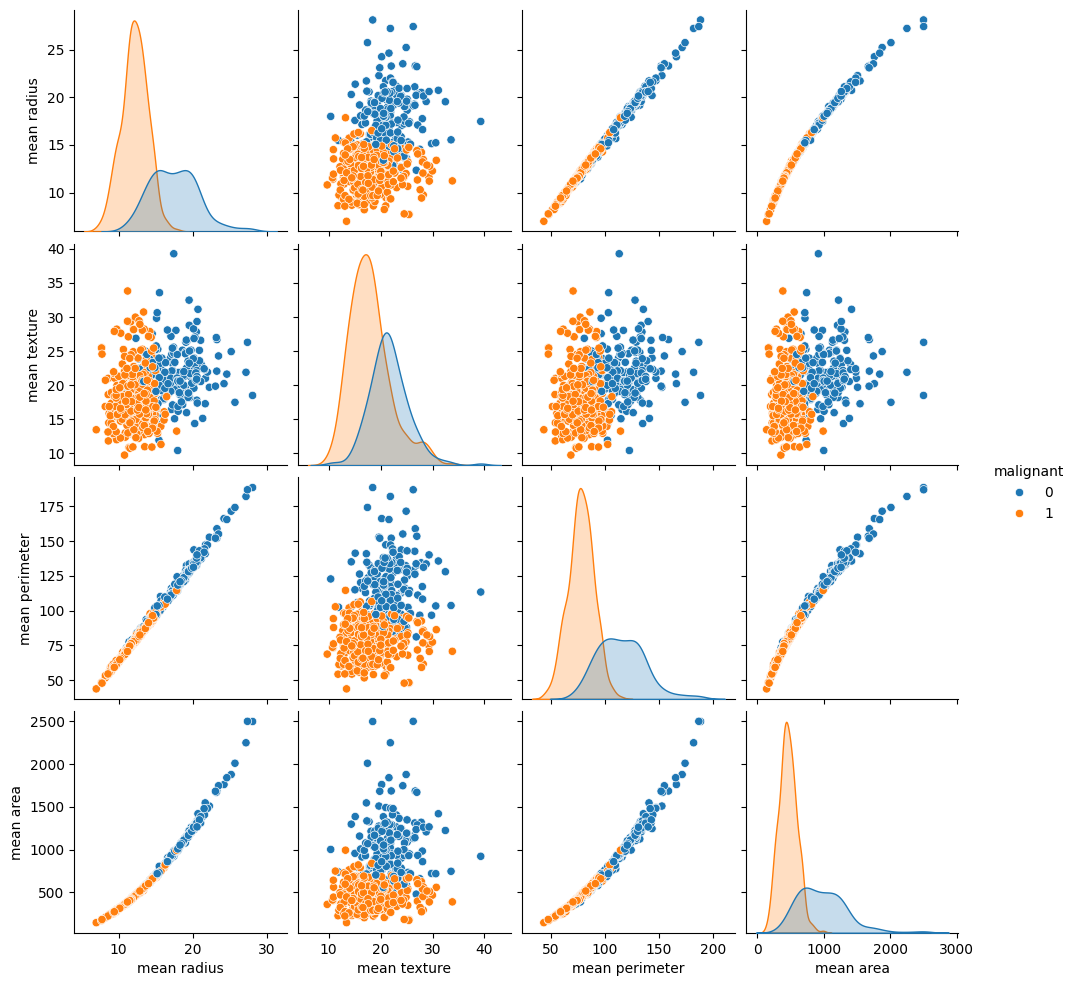

In [ ]:
sns.pairplot(df[['mean radius','mean texture','mean perimeter','mean area','malignant']],hue='malignant')
plt.show()

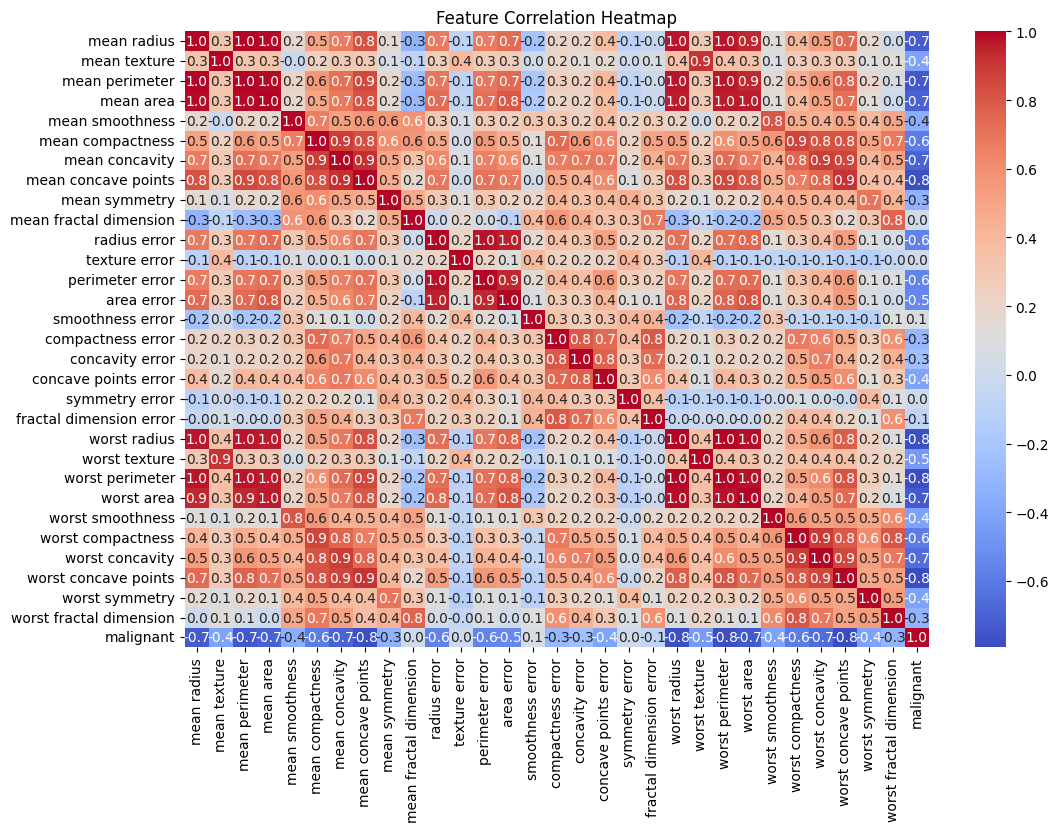

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',fmt='.1f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
scaler = StandardScaler()
df[data.feature_names] = scaler.fit_transform(df[data.feature_names])

In [ ]:
x = df[data.feature_names]
y = df['malignant']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predictions))
print("Classification Report:\n",classification_report(y_test,predictions))

Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



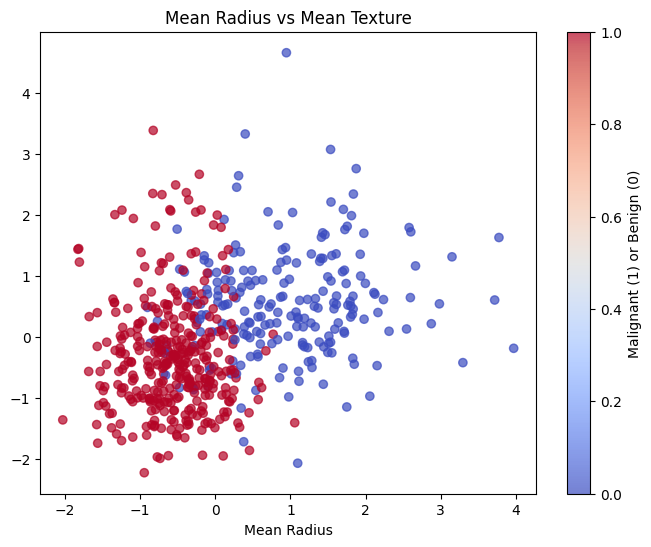

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['mean radius'],df['mean texture'],c=df['malignant'],cmap='coolwarm',alpha=0.7)
plt.xlabel('Mean Radius')
plt.title('Mean Radius vs Mean Texture')
plt.colorbar(label='Malignant (1) or Benign (0)')
plt.show()

In [ ]:
print("Enter feature values for prediction:")
user_input =[]
for feature in data.feature_names:
    values = float(input(f"{feature}:"))
    user_input.append(values)
scaled_input=scaler.transform([user_input])
result=model.predict(scaled_input)[0]
print(f'Predicted:{"Malignant" if result == 1 else"Benign"}')

Enter feature values for prediction:
